# Analisando o engajamento do Instagram

### O que queremos responder?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Vamos importar e visualizar a nossa base

In [4]:
# Importando o pandas
import pandas as pd

In [5]:
# Importar a base em excel

from src.config import DADOS_ORIGINAIS

# BASE = "Base - Analisando o engajamento no Instagram.xlsx"

df = pd.read_excel(DADOS_ORIGINAIS)
df.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tipo           52 non-null     object        
 1   Data           52 non-null     datetime64[ns]
 2   Curtidas       52 non-null     int64         
 3   Comentários    52 non-null     int64         
 4   Visualizações  15 non-null     float64       
 5   Tags           44 non-null     object        
 6   Pessoas        52 non-null     object        
 7   Campanhas      52 non-null     object        
 8   Carrossel      8 non-null      object        
 9   Interacoes     52 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 4.2+ KB


In [7]:
df["Carrossel"].unique()

array([nan, 'S'], dtype=object)

In [8]:
df["Visualizações"].isnull().sum()

37

In [9]:
with pd.option_context("float_format", "{:.2f}".format, "display.max_columns", 35):
    display(df.describe())

,Data,Curtidas,Comentários,Visualizações,Interacoes
count,52,52.00,52.00,15.00,52.00
mean,2021-12-23 04:36:55.384615424,12262.73,189.50,53295.93,12452.23
min,2021-09-11 00:00:00,2807.00,9.00,12627.00,2816.00
25%,2021-10-23 06:00:00,5492.00,69.50,23625.00,5562.50
50%,2022-01-05 00:00:00,9603.00,128.00,67205.00,9773.50
75%,2022-02-15 12:00:00,17621.75,265.25,71686.00,17920.75
max,2022-03-27 00:00:00,37351.00,852.00,92120.00,37853.00
std,NaN,8165.88,170.69,26975.18,8299.39


In [10]:
df.shape

(52, 10)

In [11]:
df.columns

Index(['Tipo', 'Data', 'Curtidas', 'Comentários', 'Visualizações', 'Tags',
       'Pessoas', 'Campanhas', 'Carrossel', 'Interacoes '],
      dtype='object')

In [12]:
# Apagando a coluna "Visualizações"
df = df.drop("Visualizações",axis=1)

### Tratando os valores nulos

In [14]:
# Filtrando os valores em que carrossel é nulo e executando a substituição

df.loc[df["Carrossel"] != "S", "Carrossel"] = "N"

**Verificando novamente os valores de Carrossel:**

In [16]:
# Verificando novamente os valores dessa coluna

df["Carrossel"].value_counts()

Carrossel
N    44
S     8
Name: count, dtype: int64

In [17]:
df[df["Curtidas"] == df["Curtidas"].min()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


### Visualizando essas informações de maneira gráfica

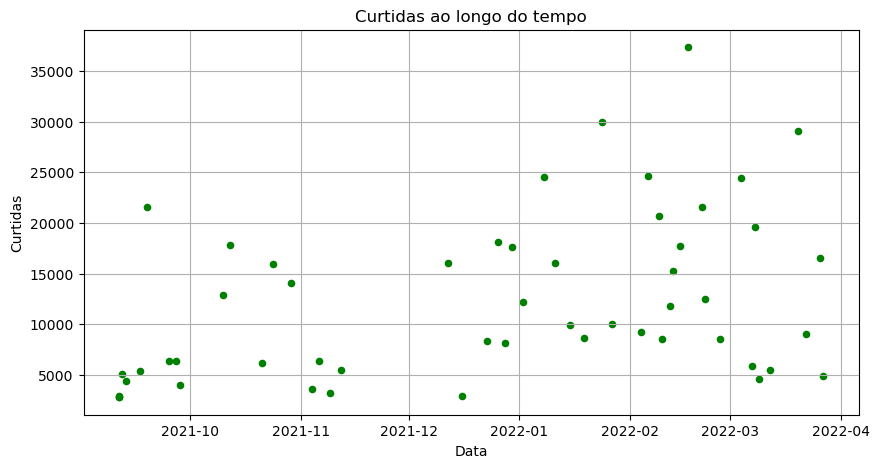

In [19]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
df.plot(
    kind="scatter",
    x="Data",
    y="Curtidas",
    figsize=(10,5),
    color="green",
    grid = True,
    title = "Curtidas ao longo do tempo"
);

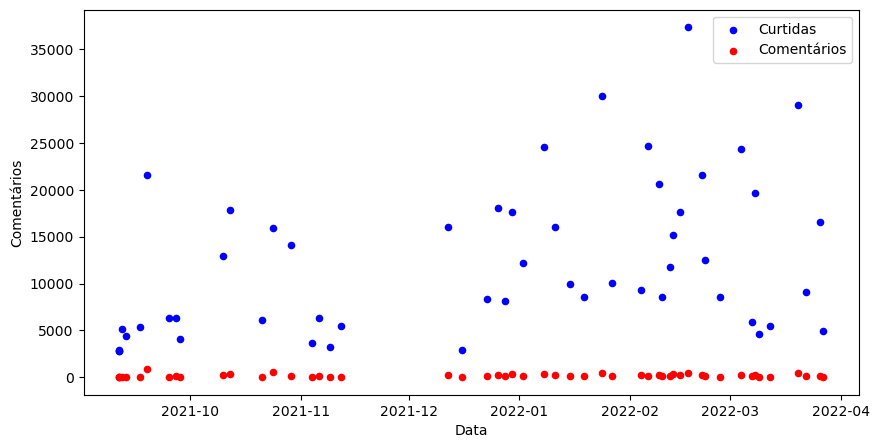

In [20]:
# Podemos colocar curtidas e comentários no mesmo gráfico
ax = df.plot(kind="scatter",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(10,5));
df.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(10,5),ax=ax);

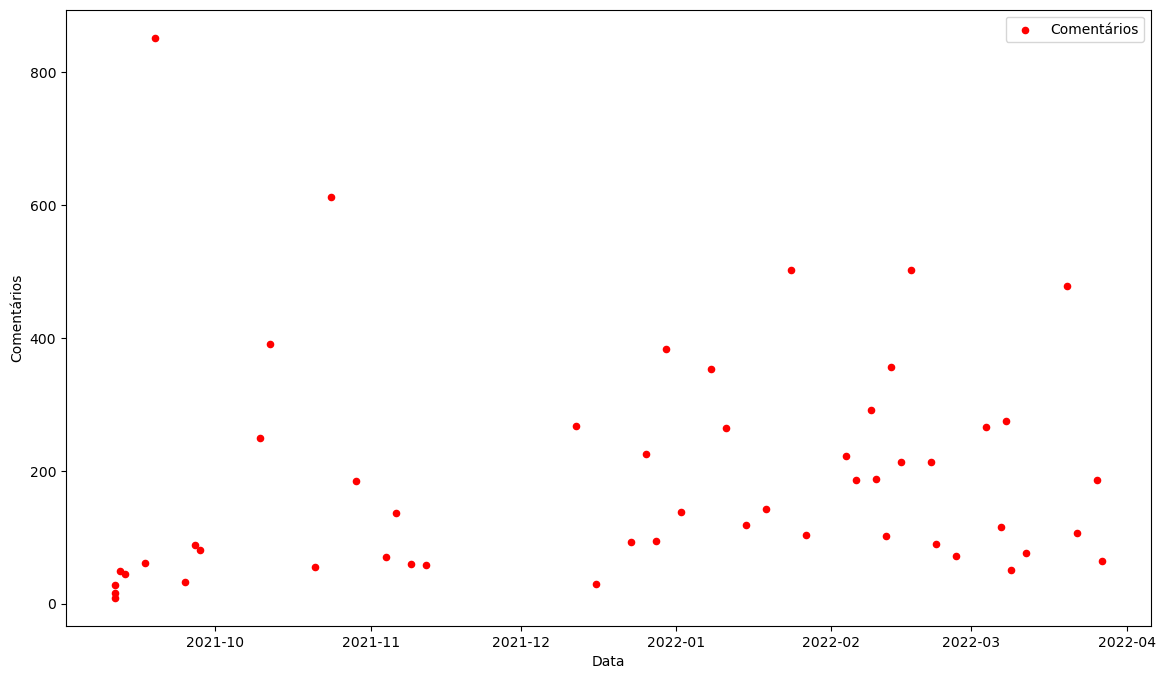

In [21]:
# A escala de curtidas pode estar atrapalhando a visualização, por isso vamos deixar comentários em um gráfico separado
df.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8));

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- Precisamos verificar se existe um padrão usando as outras colunas de informações

### A primeira coisa que podemos fazer é pegar os 5 primeiros registros com mais e menos curtidas

In [24]:
# Ordenando os valores
df.sort_values(by="Curtidas",ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [25]:
# Selecionando os 5 últimos valores 
df.sort_values(by="Curtidas").head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

In [27]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [28]:
# Agrupando as informações por tipo
df.groupby("Tipo")["Comentários"].count().to_frame().sort_values(by = "Comentários", ascending = False)

,Comentários
Tipo,
Foto,36
Vídeo,6
IGTV,5
Reels,5


- **Nesse caso pode parecer que vídeo e IGTV são estratégias ruins que não devem ser usadas**

In [30]:
pd.crosstab(df["Tipo"], df["Pessoas"], values = df["Curtidas"],aggfunc= "mean")

Pessoas,N,S
Tipo,,
Foto,"3,863.50","15,236.67"
IGTV,NaN,"6,833.40"
Reels,"5,934.50","20,832.00"
Vídeo,"4,007.50","16,409.50"


In [31]:
# Agrupando por Tipo e Pessoas
df.groupby(["Tipo","Pessoas"])["Curtidas"].mean().to_frame()

Curtidas
Tipo  Pessoas          
Foto  N        3,863.50
      S       15,236.67
IGTV  S        6,833.40
Reels N        5,934.50
      S       20,832.00
Vídeo N        4,007.50
      S       16,409.50

In [32]:
df.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean().sort_values(by = "Curtidas", ascending = False)

,,Curtidas,Comentários
Tipo,Pessoas,,
Reels,S,"20,832.00",342.00
Vídeo,S,"16,409.50",370.00
Foto,S,"15,236.67",226.20
IGTV,S,"6,833.40",133.60
Reels,N,"5,934.50",98.00
Vídeo,N,"4,007.50",65.25
Foto,N,"3,863.50",29.50


In [33]:
df.groupby(["Pessoas"])[["Curtidas",'Comentários']].mean().sort_values(by = "Curtidas", ascending = False)

,Curtidas,Comentários
Pessoas,,
S,"14,664.55",230.50
N,"4,256.67",52.83


In [34]:
# Incluindo a coluna de campanhas

df.groupby(["Campanhas"])[["Curtidas",'Comentários']].mean().sort_values(by = "Curtidas", ascending = False)

,Curtidas,Comentários
Campanhas,,
S,"18,173.27",279.95
N,"7,928.33",123.17


- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [37]:
# Carrossel (sem filtrar a base) -> essa comparação é inválida

df.groupby(["Carrossel"])[["Curtidas",'Comentários']].mean().sort_values(by = "Curtidas", ascending = False)

,Curtidas,Comentários
Carrossel,,
N,"12,343.61",198.43
S,"11,817.88",140.38


In [38]:
# Podemos também filtrar a base

df[df["Tipo"] == "Foto"].groupby(["Carrossel"])[["Curtidas",'Comentários']].mean().sort_values(by = "Curtidas", ascending = False)

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

In [41]:
# Agregando por pessoas e campanhas

df.groupby(["Pessoas", "Campanhas"])[["Curtidas",'Comentários']].mean().sort_values(by = "Curtidas", ascending = False)

Curtidas  Comentários
Pessoas Campanhas                       
S       S         19,405.35       303.20
        N          9,923.75       157.80
N       S          5,852.50        47.50
        N          3,937.50        53.90

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [43]:
# Agregando por pessoas, campanhas e tipo

df.groupby(["Tipo", "Pessoas", "Campanhas"])[["Curtidas",'Comentários']].mean().sort_values(by = "Curtidas", ascending = False)

,,,Curtidas,Comentários
Tipo,Pessoas,Campanhas,,
Reels,S,S,"24,801.00",388.50
Foto,S,S,"19,105.38",284.19
Vídeo,S,S,"16,409.50",370.00
Reels,S,N,"12,894.00",249.00
Foto,S,N,"10,815.29",159.93
IGTV,S,N,"6,833.40",133.60
Reels,N,N,"5,934.50",98.00
Foto,N,S,"5,852.50",47.50
Vídeo,N,N,"4,007.50",65.25


- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [46]:
# Vamos filtrar a base apenas onde o tipo é Vídeo

df[df["Tipo"] == "Vídeo"]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

In [48]:
df["Tags"]= df["Tags"].str.split("/")

df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437


In [49]:
df.explode("Tags")

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,N,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,N,6379
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444


## Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**rca